# Team 8 Machine Laerning 
# ENHANCING SENTIMENT ANALYSIS OF AIRLINE TWEETS THROUGH HYBRID MACHINE LEARNING MODELS

# Importing Required Libraries 

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import pandas as pd
import random
import nltk
from nltk.corpus import wordnet
import googletrans
from transformers import pipeline
from random import randint
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier

# Loading Dataset

In [2]:
# Loading the dataset
data = pd.read_csv('tweets.csv')  # file path

# Displaying the shape of the dataset
data.shape


(14640, 15)

In [3]:
# Display the first few rows of the dataset
data.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
# Displaying information about the dataset, including data types and memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [5]:
# Displaying summary statistics for numerical columns
data.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [6]:
# Checking for missing values
print("Missing values:\n", data.isnull().sum())

Missing values:
 tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64


In [7]:

# Listing of important features (adjust this based on your analysis goals)
important_features = ['airline_sentiment', 'airline_sentiment_confidence', 'negativereason', 'airline', 'retweet_count', 'text']

# Subsetting the data with important features
subset_data = data[important_features]

subset_data


,airline_sentiment,airline_sentiment_confidence,negativereason,airline,retweet_count,text
0,neutral,1.0000,NaN,Virgin America,0,@VirginAmerica What @dhepburn said.
1,positive,0.3486,NaN,Virgin America,0,@VirginAmerica plus you've added commercials t...
2,neutral,0.6837,NaN,Virgin America,0,@VirginAmerica I didn't today... Must mean I n...
3,negative,1.0000,Bad Flight,Virgin America,0,@VirginAmerica it's really aggressive to blast...
4,negative,1.0000,Can't Tell,Virgin America,0,@VirginAmerica and it's a really big bad thing...
...,...,...,...,...,...,...
14635,positive,0.3487,NaN,American,0,@AmericanAir thank you we got on a different f...
14636,negative,1.0000,Customer Service Issue,American,0,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,1.0000,NaN,American,0,@AmericanAir Please bring American Airlines to...
14638,negative,1.0000,Customer Service Issue,American,0,"@AmericanAir you have my money, you change my ..."


# Exploratory Data Analysis

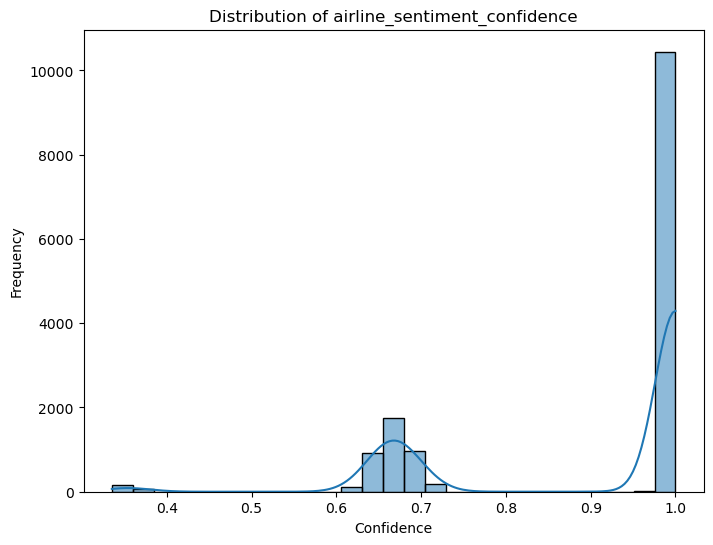

In [8]:
# Exploratory Data Analysis (EDA)

# Histogram for sentiment confidence
plt.figure(figsize=(8, 6))
sns.histplot(subset_data['airline_sentiment_confidence'], kde=True)
plt.title('Distribution of airline_sentiment_confidence')
plt.xlabel('Confidence')
plt.ylabel('Frequency')
plt.show()



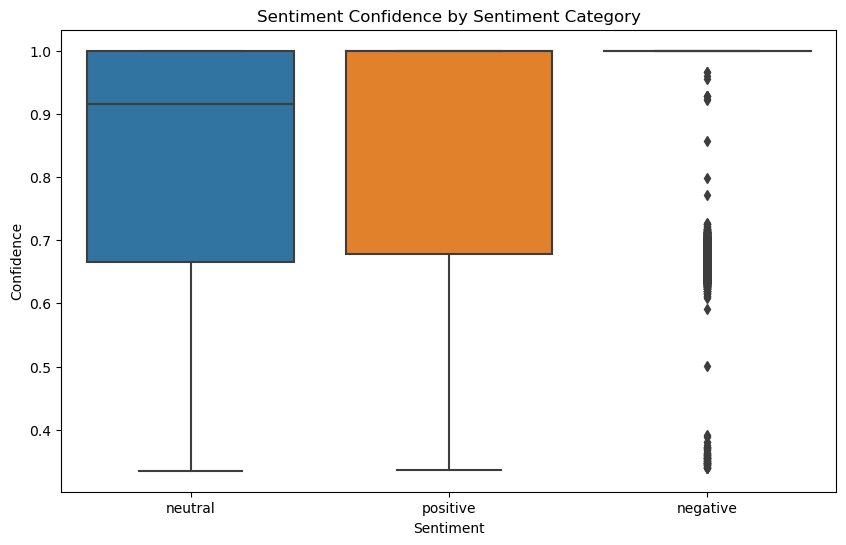

In [9]:
# Box Plot for sentiment confidence based on sentiment category
plt.figure(figsize=(10, 6))
sns.boxplot(x='airline_sentiment', y='airline_sentiment_confidence', data=subset_data)
plt.title('Sentiment Confidence by Sentiment Category')
plt.xlabel('Sentiment')
plt.ylabel('Confidence')
plt.show()



C:\Users\RoHITh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


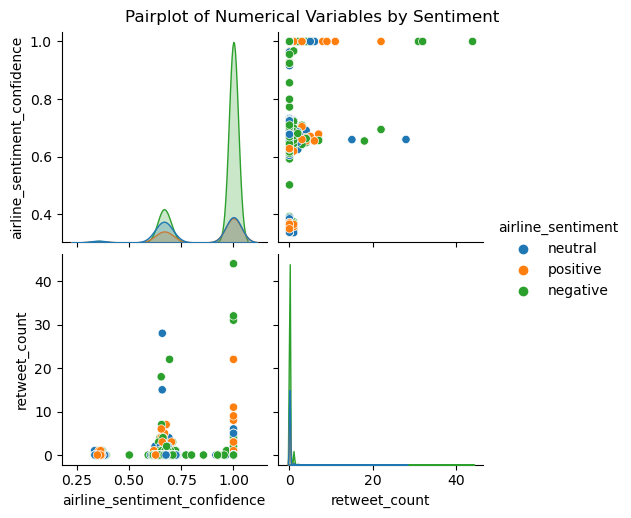

In [10]:
# Pairplot for numerical variables
sns.pairplot(subset_data, hue='airline_sentiment', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Variables by Sentiment', y=1.02)
plt.show()

C:\Users\RoHITh\AppData\Local\Temp\ipykernel_13012\2372238725.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='airline', y='airline_sentiment_confidence', hue='airline_sentiment', data=subset_data, ci=None)


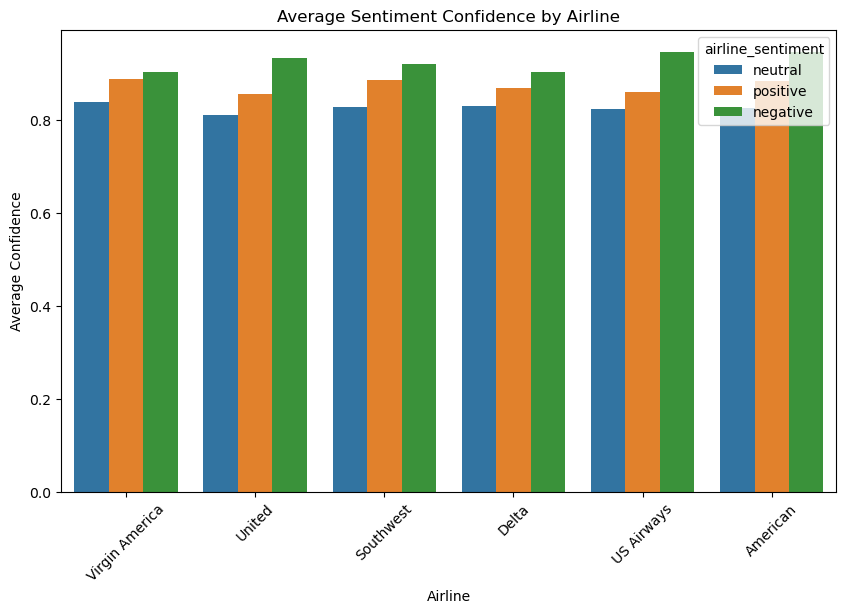

In [11]:
# Bar plot for airline vs. sentiment confidence
plt.figure(figsize=(10, 6))
sns.barplot(x='airline', y='airline_sentiment_confidence', hue='airline_sentiment', data=subset_data, ci=None)
plt.title('Average Sentiment Confidence by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Confidence')
plt.xticks(rotation=45)
plt.show()

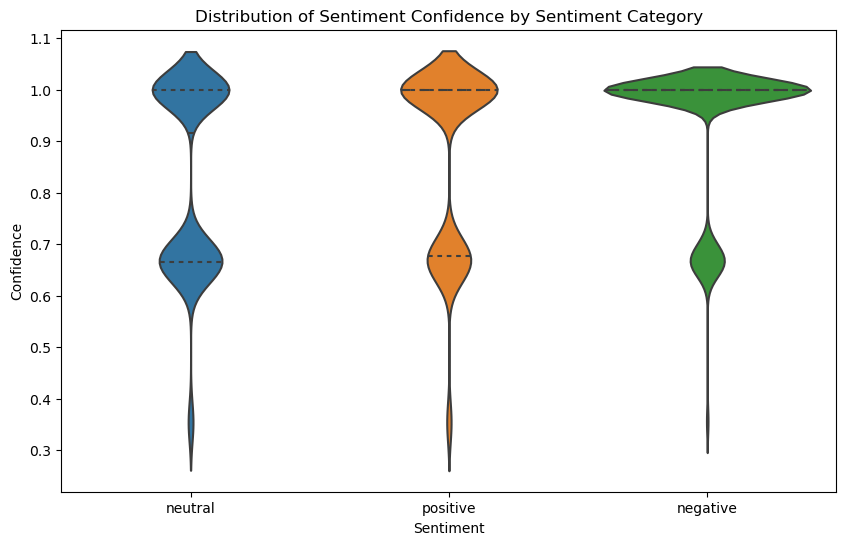

In [12]:
# Violin plot for sentiment confidence by sentiment category
plt.figure(figsize=(10, 6))
sns.violinplot(x='airline_sentiment', y='airline_sentiment_confidence', data=subset_data, inner='quartile')
plt.title('Distribution of Sentiment Confidence by Sentiment Category')
plt.xlabel('Sentiment')
plt.ylabel('Confidence')
plt.show()

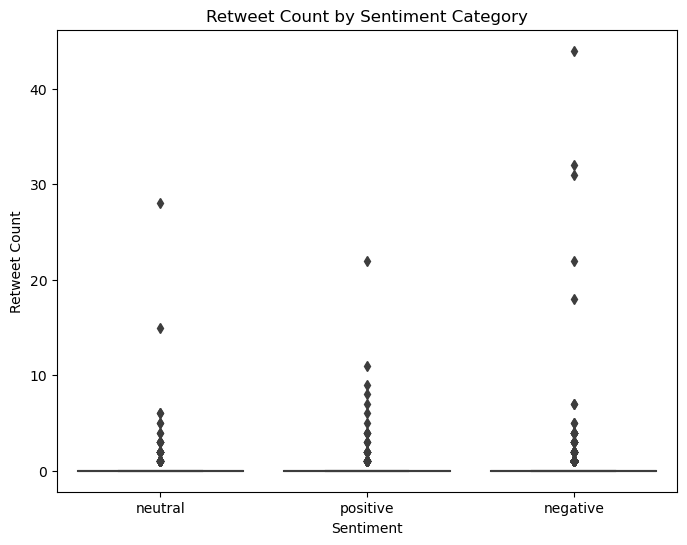

In [13]:
# Box plot for retweet_count by sentiment category
plt.figure(figsize=(8, 6))
sns.boxplot(x='airline_sentiment', y='retweet_count', data=subset_data)
plt.title('Retweet Count by Sentiment Category')
plt.xlabel('Sentiment')
plt.ylabel('Retweet Count')
plt.show()

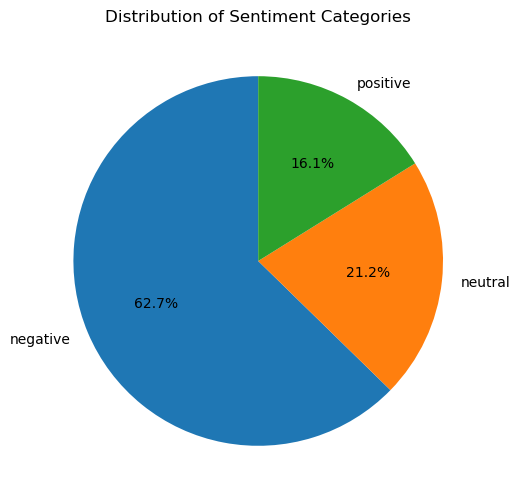

In [14]:
# Pie chart for the distribution of sentiment categories
sentiment_counts = subset_data['airline_sentiment'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sentiment Categories')
plt.show()

# DATA PREPROCESSING 

In [15]:
# Dropping columns with missing values
data_cleaned = data.dropna(axis=1)

# Subsetting the data with important features
important_features = ['airline_sentiment', 'airline_sentiment_confidence', 'airline', 'retweet_count', 'text']
subset_data = data_cleaned[important_features]
subset_data

,airline_sentiment,airline_sentiment_confidence,airline,retweet_count,text
0,neutral,1.0000,Virgin America,0,@VirginAmerica What @dhepburn said.
1,positive,0.3486,Virgin America,0,@VirginAmerica plus you've added commercials t...
2,neutral,0.6837,Virgin America,0,@VirginAmerica I didn't today... Must mean I n...
3,negative,1.0000,Virgin America,0,@VirginAmerica it's really aggressive to blast...
4,negative,1.0000,Virgin America,0,@VirginAmerica and it's a really big bad thing...
...,...,...,...,...,...
14635,positive,0.3487,American,0,@AmericanAir thank you we got on a different f...
14636,negative,1.0000,American,0,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,1.0000,American,0,@AmericanAir Please bring American Airlines to...
14638,negative,1.0000,American,0,"@AmericanAir you have my money, you change my ..."


In [16]:
pip install googletrans

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install googletrans==4.0.0-rc1


Note: you may need to restart the kernel to use updated packages.


# Data Augmentation

In [20]:

# Ensuring NLTK resources are downloaded
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Function for synonym replacement
def synonym_replacement(sentence):
    words = sentence.split()
    new_sentence = sentence
    replaced = False

    for word in words:
        synonyms = set()
        for syn in wordnet.synsets(word):
            for l in syn.lemmas():
                synonyms.add(l.name())

        if len(synonyms) > 1:
            synonyms.discard(word)  # Avoid replacing with the same word
            new_word = list(synonyms)[randint(0, len(synonyms) - 1)]
            new_sentence = new_sentence.replace(word, new_word, 1)
            replaced = True

        if replaced:
            break

    return new_sentence

# Function for back-translation
def back_translation(sentence, translator, lang='es'):
    translated = translator.translate(sentence, dest=lang).text
    back_translated = translator.translate(translated, dest='en').text
    return back_translated

# Function for text generation using GPT
def generate_text(seed_text, generator):
    generated = generator(seed_text, max_length=50, num_return_sequences=1)
    return generated[0]['generated_text']

# Load the original dataset (adjust path as necessary)
data = pd.read_csv('tweets.csv')

# Load the already augmented dataset
augmented_data = pd.read_csv(r'C:\Users\RoHITh\Desktop\ML Project\augmented_tweets.csv')

# Initialize Google Translator and GPT generator
translator = googletrans.Translator()
generator = pipeline('text-generation', model='gpt2')

# Calculate the additional samples needed
additional_neutral_needed = 9000 - 4099
additional_positive_needed = 9000 - 3363

# Select additional samples for augmentation
additional_neutral_samples = data[data['airline_sentiment'] == 'neutral']['text'].sample(additional_neutral_needed, replace=True)
additional_positive_samples = data[data['airline_sentiment'] == 'positive']['text'].sample(additional_positive_needed, replace=True)

# Apply augmentation techniques to additional samples
new_augmented_texts = []
for text in tqdm(additional_neutral_samples, desc="Further Augmenting Neutral Tweets"):
    choice = random.choice(['synonym', 'back_translation', 'gpt'])
    if choice == 'synonym':
        new_augmented_texts.append(synonym_replacement(text))
    elif choice == 'back_translation':
        new_augmented_texts.append(back_translation(text, translator))
    else:
        new_augmented_texts.append(generate_text(text, generator))

for text in tqdm(additional_positive_samples, desc="Further Augmenting Positive Tweets"):
    choice = random.choice(['synonym', 'back_translation', 'gpt'])
    if choice == 'synonym':
        new_augmented_texts.append(synonym_replacement(text))
    elif choice == 'back_translation':
        new_augmented_texts.append(back_translation(text, translator))
    else:
        new_augmented_texts.append(generate_text(text, generator))

# Update the augmented data DataFrame
additional_augmented_data = pd.DataFrame({
    'text': new_augmented_texts, 
    'airline_sentiment': ['neutral'] * additional_neutral_needed + ['positive'] * additional_positive_needed
})

# Combine the new augmented data with the existing augmented data
full_dataset = pd.concat([augmented_data, additional_augmented_data])

# Shuffle the dataset
full_dataset = full_dataset.sample(frac=1).reset_index(drop=True)

# Save the updated dataset to the same path
output_path = r'C:\Users\RoHITh\Desktop\ML Project\augmented_tweets_final.csv'
full_dataset.to_csv(output_path, index=False)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\RoHITh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\RoHITh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
Further Augmenting Neutral Tweets:   1%|▍                                          | 49/4901 [00:54<1:30:11,  1.12s/it]


KeyboardInterrupt: 

In [21]:


# Ensure NLTK resources are downloaded
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\RoHITh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\RoHITh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [22]:
# augmented data path
output_path = r'C:\Users\RoHITh\Desktop\ML Project\augmented_tweets_final.csv'
# Load the augmented dataset
augmented_data = pd.read_csv(output_path)

# Count the occurrences of each airline sentiment type
sentiment_counts = augmented_data['airline_sentiment'].value_counts()

# Display the sentiment counts
print(sentiment_counts)


airline_sentiment
negative    9178
positive    9000
neutral     9000
Name: count, dtype: int64


In [23]:
# Save the updated dataset to the same path
output_path = r'C:\Users\RoHITh\Desktop\ML Project\augmented_tweets_final.csv'
# Load the augmented dataset# Load the augmented dataset
final_data = pd.read_csv(output_path)

# Print the first 10 rows for 'airline_sentiment', 'airline_sentiment_confidence', and 'text' columns
final_data = final_data[['airline_sentiment','airline_sentiment_confidence', 'text']]

final_data

,airline_sentiment,airline_sentiment_confidence,text
0,positive,NaN,@SouthwestAir the new logo is going to look am...
1,negative,1.0,@SouthwestAir it keeps saying that mobile boar...
2,negative,1.0,@united I'd really like to get off of this pla...
3,negative,1.0,@AmericanAir 4369. about 4 flights all using s...
4,positive,NaN,@JetBlue finally taking off! Las-Fll-Sju #letsgo
...,...,...,...
27173,neutral,NaN,go_out you in ATL! “@SouthwestAir: Congrats to...
27174,positive,NaN,"@USAirways please thank Mellie at CAE, Tammy i..."
27175,positive,NaN,@JetBlue Haha. Thanks. You blackguard are grea...
27176,positive,NaN,@Americanair Aww thanks AA..dfw I was in Gmail...


In [24]:
# Check if 'airline_sentiment_confidence' column exists
if 'airline_sentiment_confidence' in final_data.columns:
    # Filter out rows where 'airline_sentiment_confidence' is less than 0.6, if it is not NaN
    final_data = final_data[(final_data['airline_sentiment_confidence'] >= 0.6) | (final_data['airline_sentiment_confidence'].isna())]

# If 'airline_sentiment_confidence' column does not exist, just include 'airline_sentiment' and 'text'
else:
    final_data = final_data[['airline_sentiment', 'text']]

In [25]:
final_data=final_data[['airline_sentiment', 'text']]
final_data

,airline_sentiment,text
0,positive,@SouthwestAir the new logo is going to look am...
1,negative,@SouthwestAir it keeps saying that mobile boar...
2,negative,@united I'd really like to get off of this pla...
3,negative,@AmericanAir 4369. about 4 flights all using s...
4,positive,@JetBlue finally taking off! Las-Fll-Sju #letsgo
...,...,...
27173,neutral,go_out you in ATL! “@SouthwestAir: Congrats to...
27174,positive,"@USAirways please thank Mellie at CAE, Tammy i..."
27175,positive,@JetBlue Haha. Thanks. You blackguard are grea...
27176,positive,@Americanair Aww thanks AA..dfw I was in Gmail...


In [26]:
# Count the occurrences of each airline sentiment type
sentiment_counts = final_data['airline_sentiment'].value_counts()

# Display the sentiment counts
print(sentiment_counts)

airline_sentiment
negative    9113
positive    8929
neutral     8898
Name: count, dtype: int64


# Text Normalization

In [27]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    
    # Tokenize text
    tokens = nltk.word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatize text
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return ' '.join(tokens)


In [28]:
from nltk.stem import WordNetLemmatizer

final_data['cleaned_text'] = final_data['text'].apply(preprocess_text)


# Final Data

In [29]:
final_data

,airline_sentiment,text,cleaned_text
0,positive,@SouthwestAir the new logo is going to look am...,southwestair new logo going look amazing airpl...
1,negative,@SouthwestAir it keeps saying that mobile boar...,southwestair keep saying mobile boarding pass ...
2,negative,@united I'd really like to get off of this pla...,united id really like get plane
3,negative,@AmericanAir 4369. about 4 flights all using s...,americanair flight using gate wbuses plane awf...
4,positive,@JetBlue finally taking off! Las-Fll-Sju #letsgo,jetblue finally taking lasfllsju letsgo
...,...,...,...
27173,neutral,go_out you in ATL! “@SouthwestAir: Congrats to...,goout atl southwestair congrats destinationdra...
27174,positive,"@USAirways please thank Mellie at CAE, Tammy i...",usairways please thank mellie cae tammy baggag...
27175,positive,@JetBlue Haha. Thanks. You blackguard are grea...,jetblue haha thanks blackguard great unlike ny...
27176,positive,@Americanair Aww thanks AA..dfw I was in Gmail...,americanair aww thanks aadfw gmail understand ...


# Feature Extraction Using TFIDF

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust the number of features as needed
X = tfidf_vectorizer.fit_transform(final_data['cleaned_text'])


In [31]:
print(X)

  (0, 2501)	0.20955601492821382
  (0, 4462)	0.20264470289880315
  (0, 790)	0.31819823078717036
  (0, 4089)	0.3577992355343937
  (0, 3868)	0.29922422529743026
  (0, 2787)	0.30839434793817766
  (0, 1703)	0.17958681505645832
  (0, 3127)	0.23109305121303772
  (0, 4843)	0.1879842750430475
  (0, 1695)	0.17591491121766725
  (0, 112)	0.2638431486016245
  (0, 157)	0.2103347055995463
  (0, 2687)	0.20731128069560395
  (0, 1881)	0.18410931600082184
  (0, 2679)	0.3423815333594662
  (0, 3022)	0.17655669408553648
  (0, 4157)	0.10021842951006141
  (1, 1479)	0.2986271481391803
  (1, 768)	0.29832023371345445
  (1, 1202)	0.33359322591792456
  (1, 4650)	0.42012705798486005
  (1, 3253)	0.37630759827546206
  (1, 520)	0.27292311229032357
  (1, 2918)	0.3526896942533092
  (1, 3897)	0.32440919198280527
  :	:
  (26936, 1110)	0.43866671635144666
  (26936, 3984)	0.1268765068929909
  (26936, 1064)	0.13323296620037672
  (26936, 3385)	0.14034505583378937
  (26936, 386)	0.18357644428251246
  (26936, 4715)	0.0928303707

In [32]:
# This step assumes your sentiments are labeled as 'negative', 'neutral', and 'positive'
sentiment_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
y = final_data['airline_sentiment'].map(sentiment_mapping)


In [33]:
print(y)

0        2
1        0
2        0
3        0
4        2
        ..
27173    1
27174    2
27175    2
27176    2
27177    1
Name: airline_sentiment, Length: 26940, dtype: int64


# Splitting Data

In [34]:

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
# Checking the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (21552, 5000)
X_test shape: (5388, 5000)
y_train shape: (21552,)
y_test shape: (5388,)


# Random Forest

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

def plot_confusion_matrix(classifier, X_test, y_test):
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

def plot_multiclass_roc(classifier, X_test, y_test, n_classes):
    y_score = classifier.predict_proba(X_test)

    # Binarize the output
    y_test_bin = label_binarize(y_test, classes=[*range(n_classes)])

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot all ROC curves
    plt.figure()
    colors = cycle(['blue', 'red', 'green'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()


In [37]:


# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [38]:


# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Print out the classification report and accuracy
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1786
           1       0.82      0.86      0.84      1757
           2       0.90      0.90      0.90      1845

    accuracy                           0.86      5388
   macro avg       0.86      0.86      0.86      5388
weighted avg       0.86      0.86      0.86      5388

Accuracy: 0.8634001484780994


In [39]:


# Step 1: Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [10, 20, 30],        # Maximum depth of the tree
    # You can add more parameters here
}

# Step 2: Run GridSearchCV
rf_clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X_train, y_train)

# Step 3: Evaluate the best model
best_rf_clf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

y_pred = best_rf_clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best Parameters: {'max_depth': 30, 'n_estimators': 200}
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.79      1786
           1       0.67      0.79      0.73      1757
           2       0.85      0.74      0.79      1845

    accuracy                           0.77      5388
   macro avg       0.78      0.77      0.77      5388
weighted avg       0.78      0.77      0.77      5388

Accuracy: 0.7676317743132888


In [40]:


# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the training set and test set
y_train_pred = rf_classifier.predict(X_train)
y_test_pred = rf_classifier.predict(X_test)

# Calculate accuracy on training set and test set
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# Check for overfitting or underfitting
if train_accuracy > test_accuracy:
    if train_accuracy - test_accuracy > 0.1:
        print("The model is likely overfitting.")
    else:
        print("The model might be slightly overfitting.")
elif train_accuracy < test_accuracy:
    print("The model might be underfitting.")
else:
    print("The model is performing consistently on training and test data.")


Training Accuracy: 0.9939680772086117
Test Accuracy: 0.8634001484780994
The model is likely overfitting.


In [41]:
rf_classifier_adjusted = RandomForestClassifier(
    n_estimators=200,       # Increased number of trees
    max_depth=20,           # Reduced maximum depth of each tree
    min_samples_split=4,    # Minimum number of samples required to split an internal node
    min_samples_leaf=2,     # Minimum number of samples required to be at a leaf node
    random_state=42,
    bootstrap=True          # Use bootstrap samples
)

rf_classifier_adjusted.fit(X_train, y_train)

# Evaluate the adjusted model
y_train_pred_adjusted = rf_classifier_adjusted.predict(X_train)
y_test_pred_adjusted = rf_classifier_adjusted.predict(X_test)
train_accuracy_adjusted = accuracy_score(y_train, y_train_pred_adjusted)
test_accuracy_adjusted = accuracy_score(y_test, y_test_pred_adjusted)

print(f"Adjusted Training Accuracy: {train_accuracy_adjusted}")
print(f"Adjusted Test Accuracy: {test_accuracy_adjusted}")

# Check if the overfitting issue is improved
if train_accuracy_adjusted > test_accuracy_adjusted:
    if train_accuracy_adjusted - test_accuracy_adjusted > 0.1:
        print("The adjusted model is still likely overfitting.")
    else:
        print("The adjusted model might be slightly overfitting.")
else:
    print("The adjusted model is performing more consistently on training and test data.")


Adjusted Training Accuracy: 0.7560783221974758
Adjusted Test Accuracy: 0.7258723088344469
The adjusted model might be slightly overfitting.


In [42]:

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, 30],        # Maximum depth of trees
    'min_samples_split': [2, 4, 6],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required at each leaf node
}

# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Perform the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Use the best estimator to make predictions
best_rf_clf = grid_search.best_estimator_
y_pred = best_rf_clf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred))

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.7555679287305122
Test Accuracy: 0.7676317743132888
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.79      1786
           1       0.67      0.79      0.73      1757
           2       0.85      0.74      0.79      1845

    accuracy                           0.77      5388
   macro avg       0.78      0.77      0.77      5388
weighted avg       0.78      0.77      0.77      5388



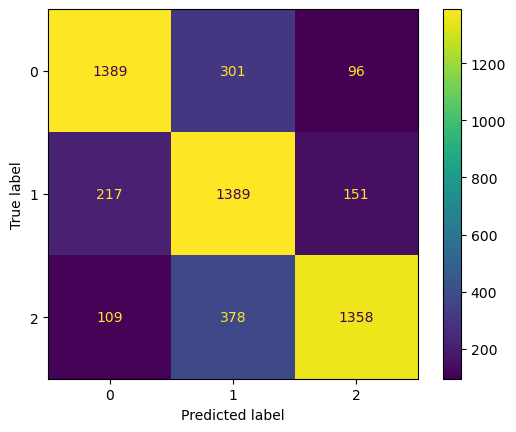

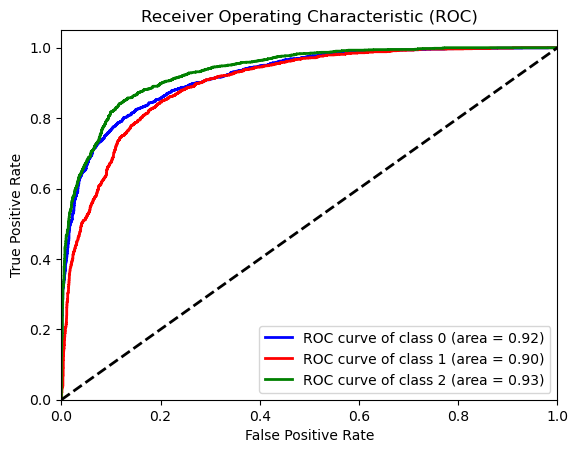

In [44]:
import numpy as np
# Now, you can call the plotting functions
plot_confusion_matrix(best_rf_clf, X_test, y_test)

# Number of classes is needed for ROC plotting
n_classes = len(np.unique(y_test))
plot_multiclass_roc(best_rf_clf, X_test, y_test, n_classes)

# Logistic Regression

In [45]:

# Define the model
log_reg = LogisticRegression(random_state=42)

# Define the hyperparameters to tune
param_grid_log_reg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['lbfgs', 'liblinear']       # Algorithm to use in the optimization problem
}

# Grid search with cross-validation
grid_log_reg = GridSearchCV(log_reg, param_grid_log_reg, cv=3, verbose=2, n_jobs=-1, scoring='accuracy')
grid_log_reg.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_log_reg.best_params_)
print("Best Score:", grid_log_reg.best_score_)

# Evaluate on test data
best_log_reg = grid_log_reg.best_estimator_
y_pred_log_reg = best_log_reg.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred_log_reg))

print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg))


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters: {'C': 10, 'solver': 'liblinear'}
Best Score: 0.8071640682999258
Test Accuracy: 0.8305493689680772
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      1786
           1       0.79      0.81      0.80      1757
           2       0.88      0.87      0.87      1845

    accuracy                           0.83      5388
   macro avg       0.83      0.83      0.83      5388
weighted avg       0.83      0.83      0.83      5388



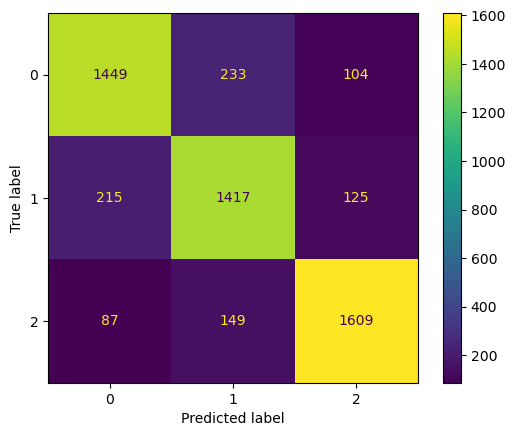

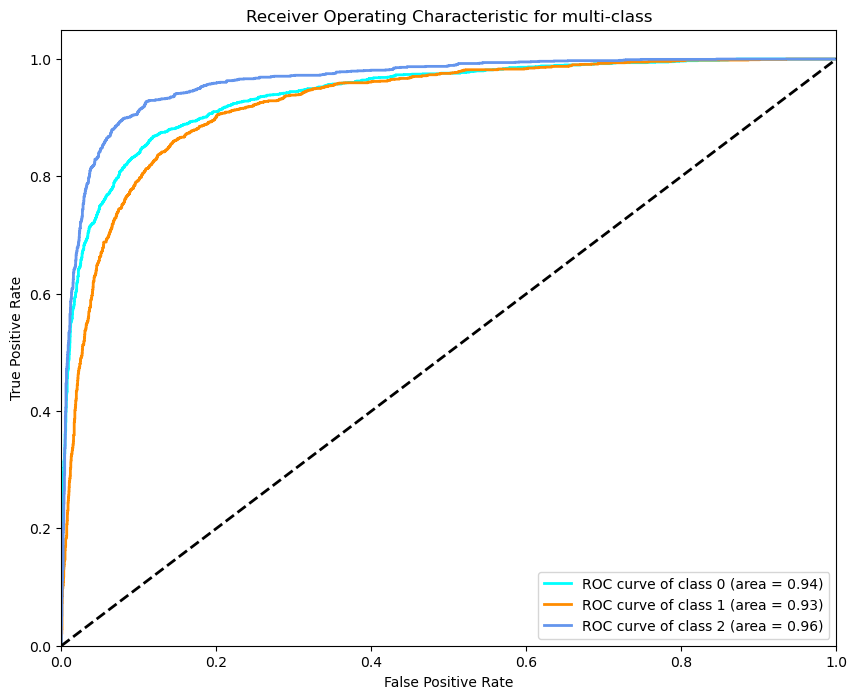

In [47]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np

# Function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

# Function to plot ROC curve for multiclass classification
def plot_multiclass_roc(classifier, X_test, y_test, n_classes):
    y_score = classifier.predict_proba(X_test)
    y_test_binarized = label_binarize(y_test, classes=[*range(n_classes)])
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(10, 8))
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for multi-class')
    plt.legend(loc="lower right")
    plt.show()

# Assuming that 'best_log_reg', 'X_test', and 'y_test' are already defined
# Plotting the confusion matrix
plot_confusion_matrix(y_test, y_pred_log_reg)

# Number of unique classes in the target variable
n_classes = len(np.unique(y_test))

# Plotting the ROC curve
plot_multiclass_roc(best_log_reg, X_test, y_test, n_classes)


# SVM

In [48]:

# Initialize the SVM model
svm_model = SVC(random_state=42)

# Define the hyperparameters to tune
param_grid_svm = {
    'C': [0.1, 1, 10],             # Regularization parameter
    'kernel': ['linear', 'rbf'],   # Type of kernel
    'gamma': ['scale', 'auto']     # Kernel coefficient
}

# Grid search with cross-validation
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=3, verbose=2, n_jobs=-1, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search_svm.best_params_)
print("Best Score:", grid_search_svm.best_score_)

# Evaluate on test data
best_svm_model = grid_search_svm.best_estimator_
y_pred_svm = best_svm_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred_svm))

print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score: 0.8609409799554566
Test Accuracy: 0.9029324424647365
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89      1786
           1       0.86      0.91      0.89      1757
           2       0.93      0.93      0.93      1845

    accuracy                           0.90      5388
   macro avg       0.90      0.90      0.90      5388
weighted avg       0.90      0.90      0.90      5388



Fitting 3 folds for each of 12 candidates, totalling 36 fits
Test Accuracy: 0.9029324424647365
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89      1786
           1       0.86      0.91      0.89      1757
           2       0.93      0.93      0.93      1845

    accuracy                           0.90      5388
   macro avg       0.90      0.90      0.90      5388
weighted avg       0.90      0.90      0.90      5388



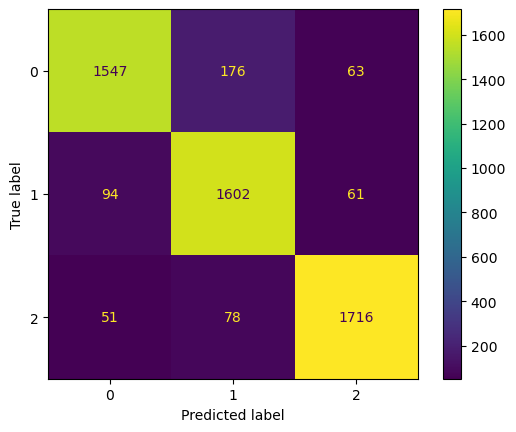

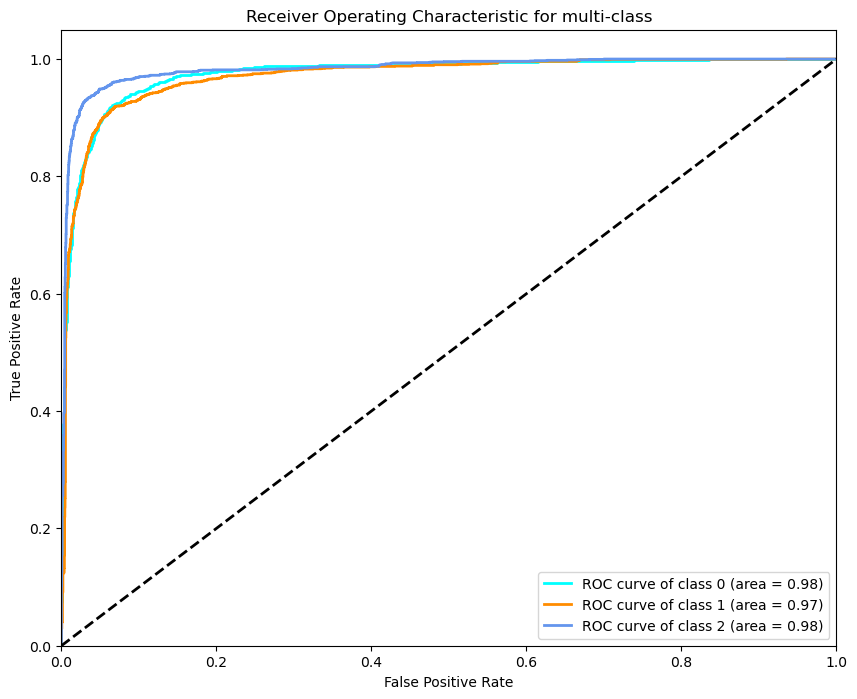

In [50]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import matplotlib.pyplot as plt
import numpy as np

# Ensure you have the necessary imports
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split

# Retrain the SVM with the probability parameter
svm_model_with_prob = SVC(random_state=42, probability=True)
grid_search_svm_with_prob = GridSearchCV(svm_model_with_prob, param_grid_svm, cv=3, verbose=2, n_jobs=-1, scoring='accuracy')
grid_search_svm_with_prob.fit(X_train, y_train)

# Use the best estimator to make predictions
best_svm_model_with_prob = grid_search_svm_with_prob.best_estimator_
y_pred_svm_with_prob = best_svm_model_with_prob.predict(X_test)
y_proba_svm_with_prob = best_svm_model_with_prob.predict_proba(X_test)

# Print the test accuracy and classification report
print("Test Accuracy:", accuracy_score(y_test, y_pred_svm_with_prob))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm_with_prob))

# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred_svm_with_prob)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Plotting the ROC curve
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_proba_svm_with_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for multi-class')
plt.legend(loc="lower right")
plt.show()


# Weighted Voting Classifier with 3 models

In [51]:
from sklearn.ensemble import VotingClassifier
# When initializing the best SVM model, ensure probability is set to True
best_svm_model = SVC(C=10, gamma='scale', kernel='rbf', probability=True, random_state=42)

# Now, use this SVM model in your Voting Classifier
voting_clf_weighted = VotingClassifier(
    estimators=[
        ('rf', best_rf_clf),       # Random Forest
        ('svm', best_svm_model),   # SVM with probability enabled
        ('log_reg', best_log_reg)  # Logistic Regression
    ],
    voting='soft',
    weights=[1, 3, 2]
)

# Fit and evaluate the model as before
voting_clf_weighted.fit(X_train, y_train)
y_pred_weighted = voting_clf_weighted.predict(X_test)
weighted_accuracy = accuracy_score(y_test, y_pred_weighted)
print("Weighted Hybrid Model Accuracy:", weighted_accuracy)

print("Weighted Hybrid Model Classification Report:\n", classification_report(y_test, y_pred_weighted))

Weighted Hybrid Model Accuracy: 0.8958797327394209
Weighted Hybrid Model Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      1786
           1       0.86      0.89      0.88      1757
           2       0.93      0.93      0.93      1845

    accuracy                           0.90      5388
   macro avg       0.90      0.90      0.90      5388
weighted avg       0.90      0.90      0.90      5388



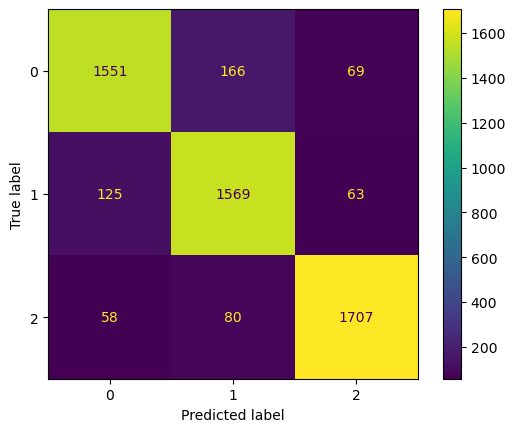

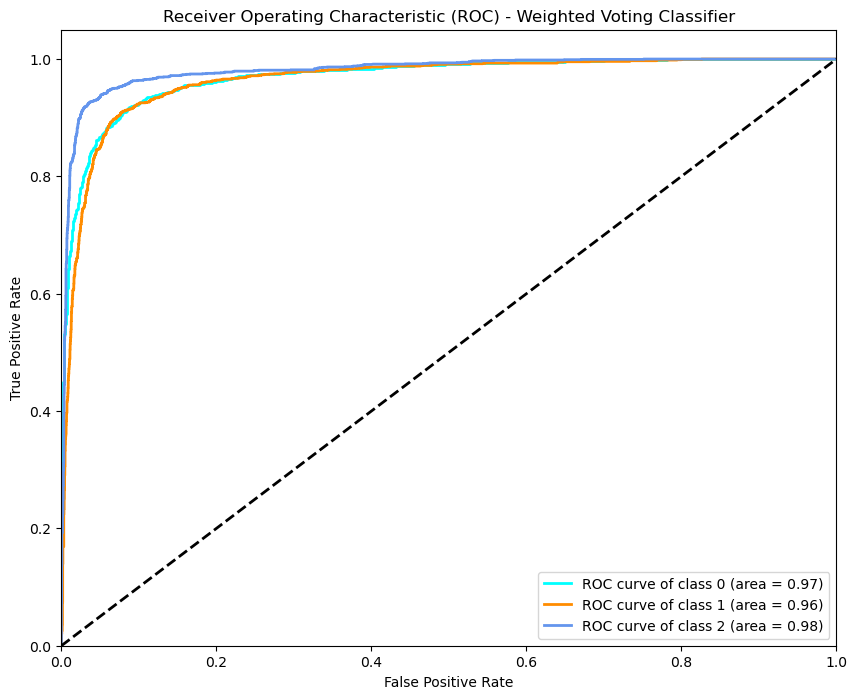

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np

# Function to plot the confusion matrix
def plot_confusion_matrix_voting(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

# Function to plot ROC curve for multiclass classification
def plot_multiclass_roc_voting(classifier, X_test, y_test, n_classes):
    y_prob = classifier.predict_proba(X_test)
    y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(10, 8))
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) - Weighted Voting Classifier')
    plt.legend(loc="lower right")
    plt.show()

# Plotting the confusion matrix for the voting classifier
plot_confusion_matrix_voting(y_test, y_pred_weighted)

# Plotting the ROC curve for the voting classifier
n_classes = len(np.unique(y_test))  # Assuming y_test contains all classes
plot_multiclass_roc_voting(voting_clf_weighted, X_test, y_test, n_classes)


# Weighted Voting Classifier with 2 models

In [55]:
# Now, use this SVM model in your Voting Classifier
voting_clf_weighted = VotingClassifier(
    estimators=[      # Random Forest
        ('svm', best_svm_model),   # SVM with probability enabled
        ('log_reg', best_log_reg)  # Logistic Regression
    ],
    voting='soft',
    weights=[2,1]
)

# Fit and evaluate the model as before
voting_clf_weighted.fit(X_train, y_train)
y_pred_weighted = voting_clf_weighted.predict(X_test)
weighted_accuracy = accuracy_score(y_test, y_pred_weighted)
print("Weighted Hybrid Model Accuracy:", weighted_accuracy)
print("Weighted Hybrid Model Classification Report:\n", classification_report(y_test, y_pred_weighted))

Weighted Hybrid Model Accuracy: 0.897735708982925
Weighted Hybrid Model Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88      1786
           1       0.87      0.89      0.88      1757
           2       0.93      0.93      0.93      1845

    accuracy                           0.90      5388
   macro avg       0.90      0.90      0.90      5388
weighted avg       0.90      0.90      0.90      5388



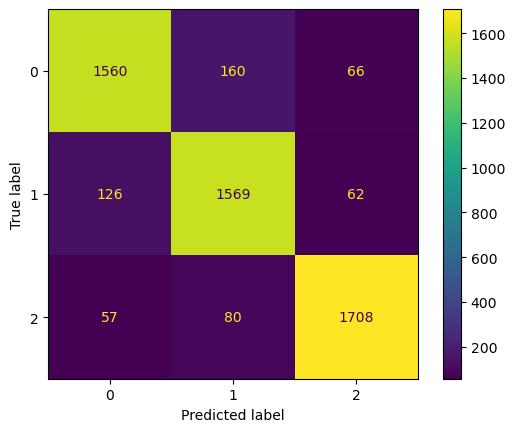

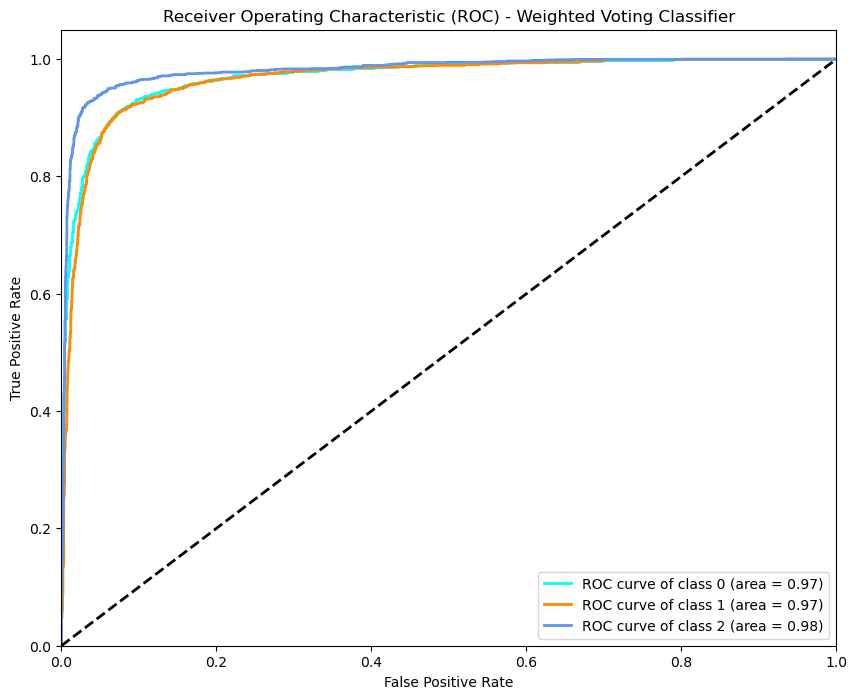

In [56]:
# Plotting the confusion matrix for the voting classifier
plot_confusion_matrix_voting(y_test, y_pred_weighted)

# Plotting the ROC curve for the voting classifier
n_classes = len(np.unique(y_test))  # Assuming y_test contains all classes
plot_multiclass_roc_voting(voting_clf_weighted, X_test, y_test, n_classes)

# Stacking Ensemble with logistic and svm

In [57]:

# Initialize the base learners with their best parameters
svm_clf = SVC(C=10, gamma='scale', kernel='rbf', probability=True, random_state=42)
log_reg_clf = LogisticRegression(C=10, solver='liblinear', random_state=42)

# Initialize the final estimator (meta-learner)
final_estimator = LogisticRegression(random_state=42)

# Create the stacking ensemble
stacking_clf = StackingClassifier(
    estimators=[('svm', svm_clf), ('log_reg', log_reg_clf)],
    final_estimator=final_estimator,
    cv=5
)

# Train the stacking ensemble
stacking_clf.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred_stacking = stacking_clf.predict(X_test)
stacking_accuracy = accuracy_score(y_test, y_pred_stacking)
print("Stacking Ensemble Accuracy:", stacking_accuracy)
print("Stacking Ensemble Classification Report:\n", classification_report(y_test, y_pred_stacking))


Stacking Ensemble Accuracy: 0.9114699331848553
Stacking Ensemble Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      1786
           1       0.89      0.90      0.90      1757
           2       0.94      0.93      0.94      1845

    accuracy                           0.91      5388
   macro avg       0.91      0.91      0.91      5388
weighted avg       0.91      0.91      0.91      5388



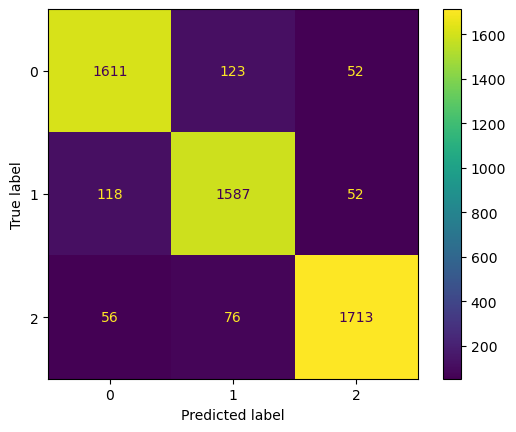

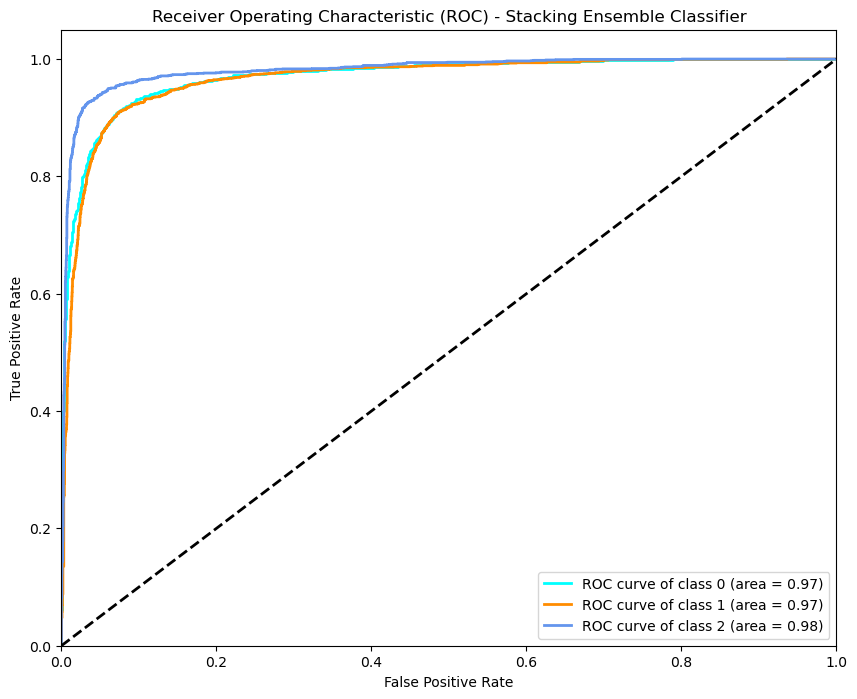

In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np

# Function to plot the confusion matrix
def plot_confusion_matrix_voting(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

# Function to plot ROC curve for multiclass classification
def plot_multiclass_roc_voting(classifier, X_test, y_test, n_classes):
    y_prob = classifier.predict_proba(X_test)
    y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(10, 8))
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) - Stacking Ensemble Classifier')
    plt.legend(loc="lower right")
    plt.show()

# Plotting the confusion matrix for the voting classifier
plot_confusion_matrix_voting(y_test, y_pred_stacking)

# Plotting the ROC curve for the voting classifier
n_classes = len(np.unique(y_test))  # Assuming y_test contains all classes
plot_multiclass_roc_voting(voting_clf_weighted, X_test, y_test, n_classes)



In [ ]:
import pickle

# Assuming 'stacking_clf' is your trained Stacking Ensemble model
model = stacking_clf

# Define the path where you want to save the model
output_path = r'C:\Users\RoHITh\Desktop\ML Project\stacking_ensemble_model.pkl'

# Save the model as a pickle file
with open(output_path, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved successfully at {output_path}")


In [ ]:
# Save the TF-IDF Vectorizer
vectorizer_path = r'C:\Users\RoHITh\Desktop\ML Project\tfidf_vectorizer_final.pkl'
with open(vectorizer_path, 'wb') as file:
    pickle.dump(tfidf_vectorizer, file)


In [ ]:
tfidf_vectorizer = TfidfVectorizer()
X_transformed = tfidf_vectorizer.fit_transform(final_data['cleaned_text'])
number_of_features = X_transformed.shape[1]


In [ ]:
print(number_of_features)